# Summary

The iris database, which consists of four features (sepal length, sepal width, petal length, and pedal width) and three classifications (setosa, versicolour, and virginica), was analyzed using both Logistic Regression and K-Nearest Neighbors (KNN). 

The Logistic Regression model reached an accuracy 95% while the KNN model reached an accuarcy of 98.3% on the validation set.

# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Loading in the iris database from sklearn
iris = load_iris()
X = iris.data
y = iris.target
len(X)

150

In [3]:
#Taking a look at the description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#Setting up a dataframe for the independent variables
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length', 'Petal Width'])
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [6]:
#Setting up a dataframe for the dependent variables
#Apply function to dependent variable to convert to text instead of ints
iris_target = DataFrame(y,columns=['Species'])
iris_target['Species'] = iris_target.Species.apply(flower)
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [7]:
#Concat the two dataframes into one with both independent and dependent variables
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Visualizing the data

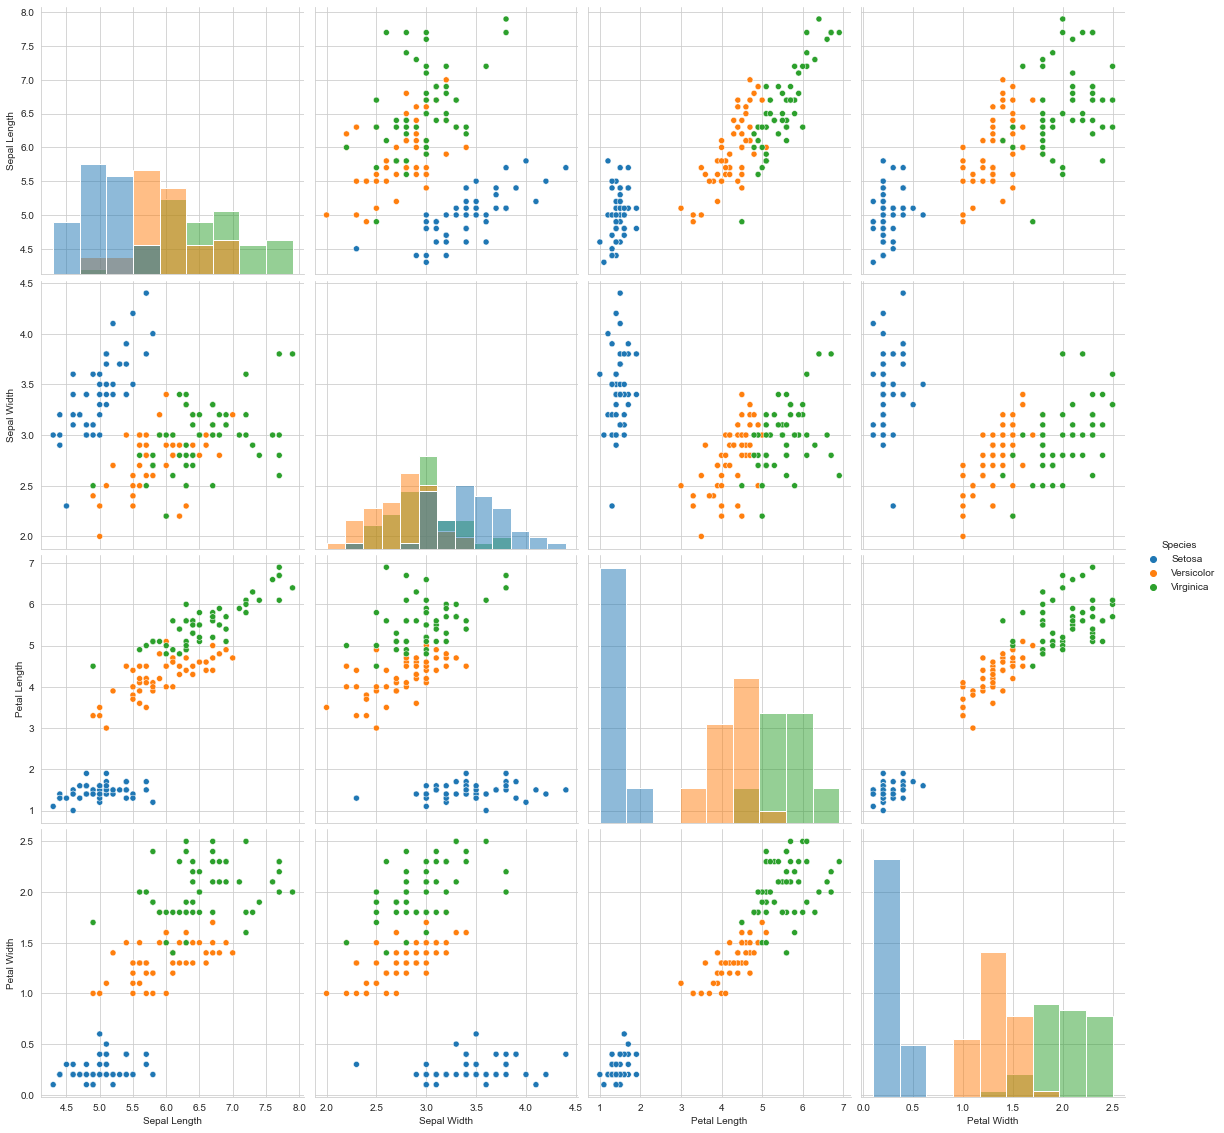

In [8]:
sns.pairplot(iris,hue='Species',height=4, diag_kind='hist')

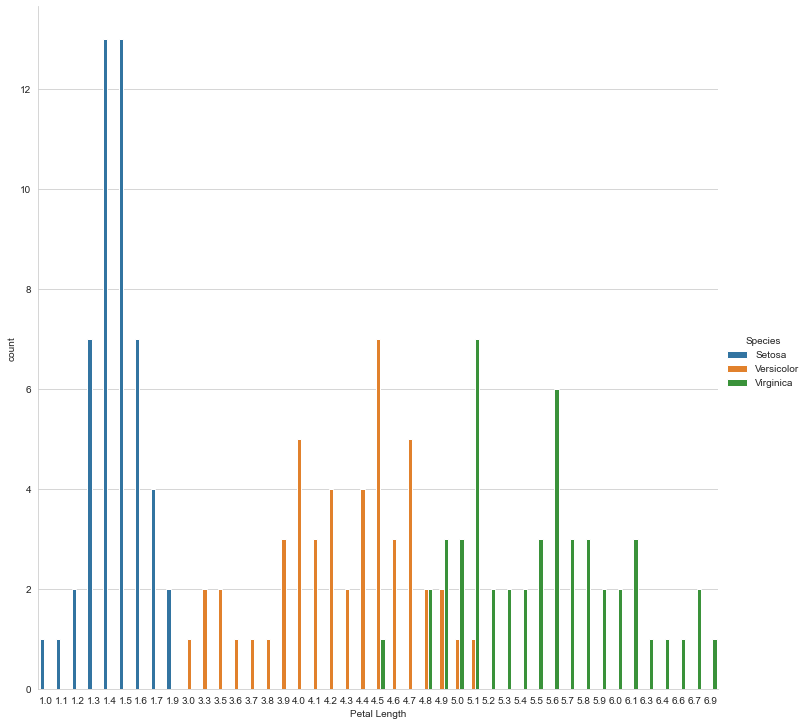

In [9]:
sns.catplot(x='Petal Length',data=iris,hue='Species',height=10,kind='count')

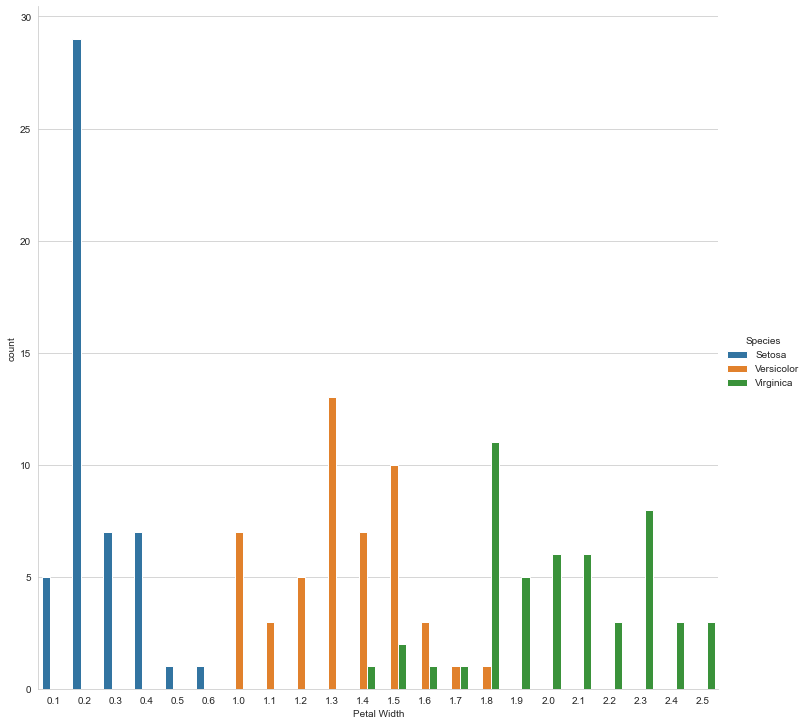

In [10]:
sns.catplot(x='Petal Width',data=iris,hue='Species',height=10,kind='count')

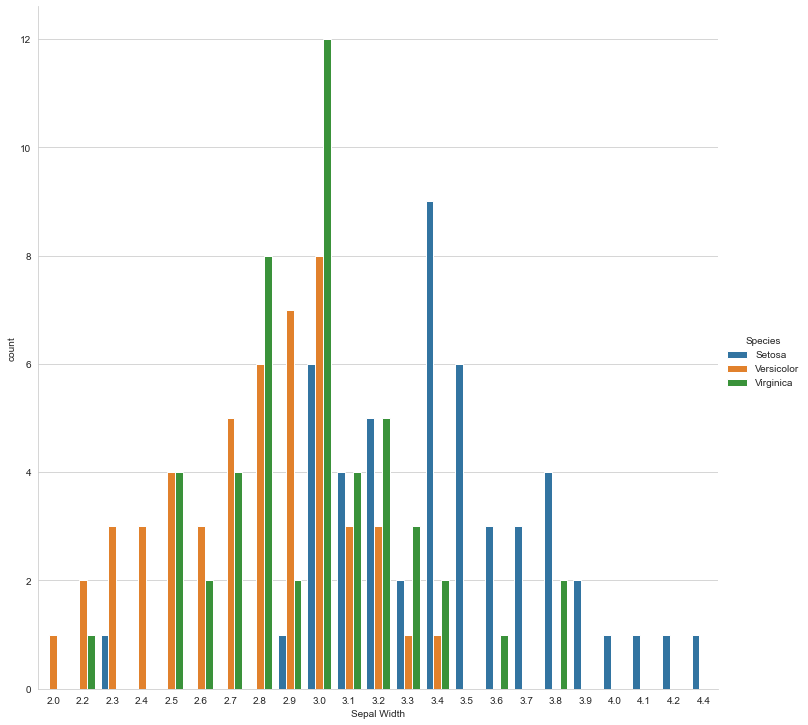

In [11]:
sns.catplot(x='Sepal Width',data=iris,hue='Species',height=10,kind='count')

In [12]:
#Splitting the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [13]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building, training, and evaluating the model

In [14]:
#Creating a function that will make a confusion matrix and determine the accuracy
def GetCMandAcc(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap(cm, annot=cm, fmt='', cbar=False, cmap='Blues')
    print ('Accuracy: ', np.round(accuracy_score(y_test, y_pred),3))
    return hm

Accuracy:  0.95


<AxesSubplot:>

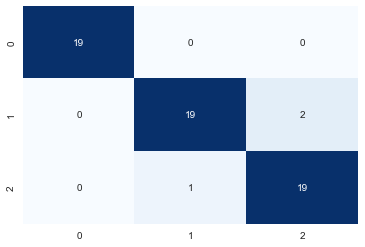

In [15]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
#0 = Setosa, 1 = Versicolor, 2 = Virginica
GetCMandAcc(logreg, X_test, y_test)

In [16]:
#Taking a look at the coefficients for logistic regression
coefs = []
#Get the coefficients
for i in logreg.coef_:
    coefs.append(np.transpose(i))
#Create a dictionary
coefs_dict = {'Setosa':coefs[0],
            'Versicolor':coefs[1],
            'Virginica':coefs[2]}
coefs_df = DataFrame(coefs_dict)
coefs_df.insert(0,'Characteristic', ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
coefs_df

,Characteristic,Setosa,Versicolor,Virginica
0,Sepal Length,-0.992465,0.761990,0.230475
1,Sepal Width,0.882012,-0.588886,-0.293126
2,Petal Length,-1.560017,-0.318647,1.878665
3,Petal Width,-1.399885,-0.682463,2.082348


Accuracy:  0.983


<AxesSubplot:>

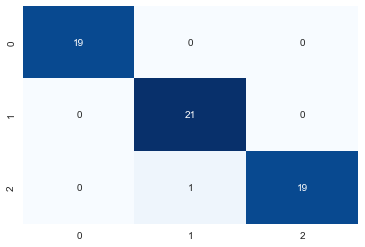

In [17]:
#Taking a look at the KNN classifier since there was some pretty good separation between our data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
#0 = Setosa, 1 = Versicolor, 2 = Virginica
GetCMandAcc(knn, X_test, y_test)

In [18]:
#Since the dataset is small, we can interate through the best choice of n_neighbors
accuracy=[]
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

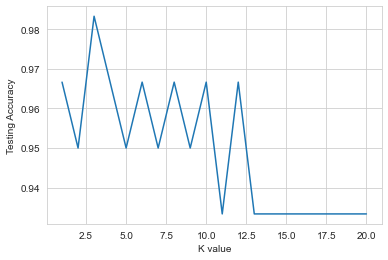

In [19]:
plt.plot([i for i in range(1,len(accuracy)+1)],accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')